# Dataset Dự Đoán Nguy Cơ Đột Quỵ

## Bối Cảnh
Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ 2 trên toàn cầu, chiếm khoảng 11% tổng số ca tử vong. Bộ dữ liệu này được sử dụng để dự đoán khả năng bệnh nhân bị đột quỵ dựa trên các thông số đầu vào như giới tính, tuổi tác, các bệnh lý khác nhau và tình trạng hút thuốc. Mỗi dòng trong dữ liệu cung cấp thông tin liên quan về bệnh nhân.

## Thông Tin Các Thuộc Tính

1. **id**: Mã định danh duy nhất
2. **gender**: Giới tính
  - "Male" (Nam)  
  - "Female" (Nữ)
  - "Other" (Khác)
3. **age**: Tuổi của bệnh nhân
4. **hypertension**: Tình trạng huyết áp cao
  - 0: Không bị huyết áp cao
  - 1: Có bị huyết áp cao
5. **heart_disease**: Bệnh tim
  - 0: Không có bệnh tim
  - 1: Có bệnh tim
6. **ever_married**: Tình trạng hôn nhân
  - "No" (Chưa kết hôn)
  - "Yes" (Đã kết hôn)
7. **work_type**: Loại hình công việc
  - "children" (Trẻ em)
  - "Govt_job" (Công việc nhà nước)
  - "Never_worked" (Chưa từng làm việc)
  - "Private" (Tư nhân)
  - "Self-employed" (Tự kinh doanh)
8. **Residence_type**: Khu vực sinh sống
  - "Rural" (Nông thôn)
  - "Urban" (Thành thị)  
9. **avg_glucose_level**: Mức đường huyết trung bình trong máu
10. **bmi**: Chỉ số khối cơ thể
11. **smoking_status**: Tình trạng hút thuốc
   - "formerly smoked" (Đã từng hút thuốc)
   - "never smoked" (Chưa từng hút thuốc)
   - "smokes" (Đang hút thuốc)
   - "Unknown"* (Không xác định)
12. **stroke**: Tình trạng đột quỵ
   - 0: Không bị đột quỵ
   - 1: Đã bị đột quỵ

> *Lưu ý: "Unknown" trong smoking_status nghĩa là thông tin về tình trạng hút thuốc không có sẵn đối với bệnh nhân này.

# Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_theme()

# setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# show all columns on output
pd.set_option('display.max_columns', 999)

# Data Exploration

## Unzip dataset từ Kaggle

In [5]:
import zipfile
import os

# Đường dẫn đến file zip
zip_path = '/content/archive.zip'

# Thư mục đích để giải nén
extract_path = '/content'

# Kiểm tra file tồn tại
if os.path.exists(zip_path):
    # Mở và giải nén file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print("Đã giải nén file thành công!")

        # In ra danh sách các file đã giải nén
        print("\nCác file đã được giải nén:")
        for file in zip_ref.namelist():
            print(f"- {file}")
else:
    print(f"Không tìm thấy file {zip_path}")

Đã giải nén file thành công!

Các file đã được giải nén:
- healthcare-dataset-stroke-data.csv


In [6]:
file_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
802,4970,Male,79.00,0,0,Yes,Self-employed,Rural,112.64,28.50,formerly smoked,0
1926,5723,Female,50.00,0,0,Yes,Private,Urban,91.08,26.40,never smoked,0
4982,949,Male,20.00,0,0,No,Private,Rural,75.90,32.20,never smoked,0
3251,14877,Male,0.56,0,0,No,children,Rural,127.23,20.10,Unknown,0
974,11973,Female,10.00,0,0,No,children,Urban,124.60,18.60,Unknown,0
2340,52554,Male,19.00,0,0,No,Private,Rural,64.92,22.50,Unknown,0
1661,63491,Female,63.00,0,0,Yes,Private,Urban,109.65,28.60,formerly smoked,0
4487,50009,Female,17.00,0,0,No,Private,Urban,81.51,19.50,formerly smoked,0
3074,72231,Female,47.00,0,0,Yes,Self-employed,Rural,195.61,NaN,never smoked,0
2451,47937,Female,57.00,0,0,Yes,Self-employed,Rural,78.14,35.80,never smoked,0


## Kích thước của dữ liệu

In [7]:
df.shape

(5110, 12)

## Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## describe

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.00,36517.83,21161.72,67.00,17741.25,36932.00,54682.00,72940.00
age,5110.00,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.00,0.05,0.23,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5110.00,106.15,45.28,55.12,77.25,91.88,114.09,271.74
bmi,4909.00,28.89,7.85,10.30,23.50,28.10,33.10,97.60
stroke,5110.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00


In [10]:
df.describe(include = 'O').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


## Missing value

In [11]:
df.isna().sum().to_frame()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


## Meaningless rows

In [14]:
df[df['bmi'].isna()].head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


### Percentage null

In [18]:
percentage = (df['bmi'].isna().sum() / df.shape[0]) * 100
print(f'Percentage null of bmi: {percentage:.2f}%')

Percentage null of bmi: 3.93%


- Số lượng giá trị Null cột bmi không quá lớn, nên có thể xử lý bằng cách điền dựa theo những đặc điểm tương đồng

## Smoke

In [53]:
cleaned_df[cleaned_df['smoking_status'] == 'Unknown'].shape

(1544, 12)

- Coi smoke Unknown như một thông tin riêng biệt luôn

# Data Cleaning

In [19]:
cleaned_df = df.copy()

## Handle missing values BMI

--
Các điều kiện được chọn có ý nghĩa về mặt y tế:

- Giới tính ảnh hưởng đến BMI
- Độ tuổi gần nhau (±5) thường có xu hướng BMI tương tự
- Glucose level liên quan đến chế độ ăn/lối sống, nên cũng liên quan đến BMI

In [22]:
# Hàm điền giá trị thiếu cho BMI
def fill_bmi(row):
    if pd.isna(row['bmi']):
        # Tìm nhóm tương đồng mức 1 (match tất cả điều kiện)
        similar_group = df[
            (df['gender'] == row['gender']) &
            (abs(df['age'] - row['age']) <= 5) &
            (abs(df['avg_glucose_level'] - row['avg_glucose_level']) <= 20) &
            (df['smoking_status'] == row['smoking_status']) &
            (df['bmi'].notna())
        ]

        # Tìm nhóm tương đồng mức 2 (bỏ điều kiện smoking)
        if len(similar_group) < 5:
            similar_group = df[
                (df['gender'] == row['gender']) &
                (abs(df['age'] - row['age']) <= 5) &
                (abs(df['avg_glucose_level'] - row['avg_glucose_level']) <= 20) &
                (df['bmi'].notna())
            ]

        # Tìm nhóm tương đồng mức 3 (chỉ giữ gender và age)
        if len(similar_group) < 5:
            similar_group = df[
                (df['gender'] == row['gender']) &
                (abs(df['age'] - row['age']) <= 10) &
                (df['bmi'].notna())
            ]

        # Nếu không tìm được nhóm tương đồng nào, dùng median chung
        if len(similar_group) == 0:
            return df['bmi'].median()

        return similar_group['bmi'].median()
    return row['bmi']

In [23]:
# Kiểm tra số lượng giá trị thiếu ban đầu
print("Số lượng NaN ban đầu:", cleaned_df['bmi'].isna().sum())
print("\nThống kê BMI trước khi điền:")
print(df['bmi'].describe())

# Áp dụng hàm để điền giá trị thiếu
cleaned_df['bmi'] = cleaned_df.apply(fill_bmi, axis=1)

# Kiểm tra kết quả sau khi điền
print("\nSố lượng NaN còn lại:", cleaned_df['bmi'].isna().sum())
print("\nThống kê BMI sau khi điền:")
print(cleaned_df['bmi'].describe())

Số lượng NaN ban đầu: 201

Thống kê BMI trước khi điền:
count                4909.00
mean                   28.89
std                     7.85
min                    10.30
25%                    23.50
50%                    28.10
75%                    33.10
max                    97.60
Name: bmi, dtype: float64

Số lượng NaN còn lại: 0

Thống kê BMI sau khi điền:
count                5110.00
mean                   28.91
std                     7.75
min                    10.30
25%                    23.70
50%                    28.20
75%                    33.00
max                    97.60
Name: bmi, dtype: float64


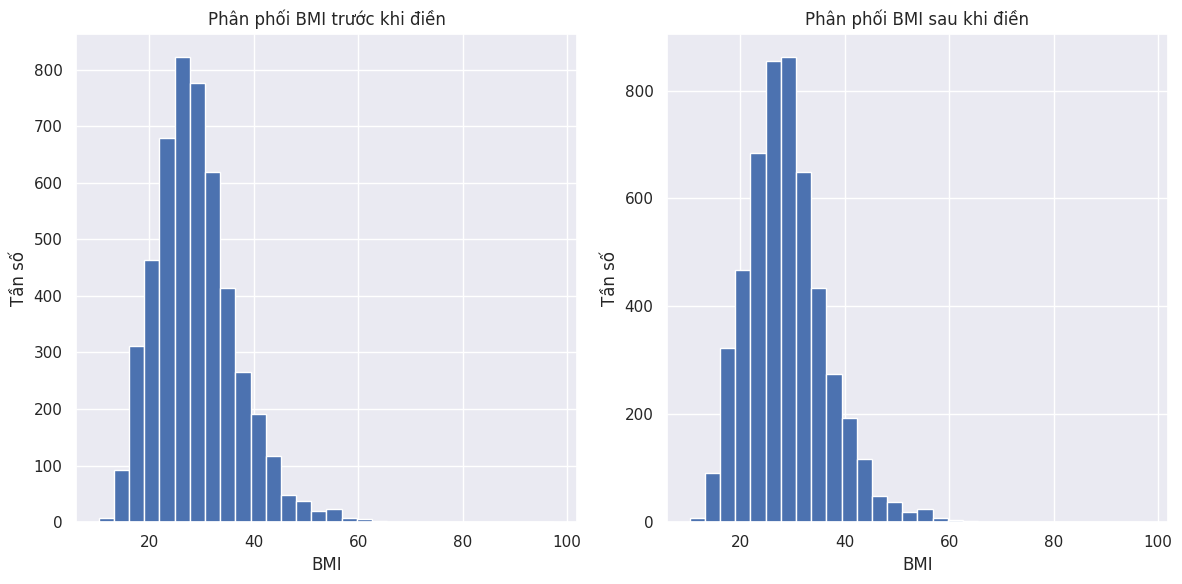

In [29]:
# Vẽ histogram so sánh phân phối trước và sau khi điền
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Subplot cho phân phối BMI ban đầu
plt.subplot(1, 2, 1)
df['bmi'].hist(bins=30)
plt.title('Phân phối BMI trước khi điền')
plt.xlabel('BMI')
plt.ylabel('Tần số')

plt.subplot(1, 2, 2)
# Subplot cho phân phối BMI sau khi điền
cleaned_df['bmi'].hist(bins=30)
plt.title('Phân phối BMI sau khi điền')
plt.xlabel('BMI')
plt.ylabel('Tần số')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Feature Engineering

## Feature Classification: Categorical vs Numerical

In [46]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### check unique value

In [49]:
cleaned_df.nunique().to_frame()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,465


In [54]:
# Convert simultaneously columns that belong categorical
def convert_dtype_category(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

In [55]:
numerical_features = ["id", "age", "avg_glucose_level", "bmi"]
categorical_features = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]

In [57]:
convert_dtype_category(cleaned_df, categorical_features)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


---
## Numerical

### Histogram for numerical

In [39]:
cleaned_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [40]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


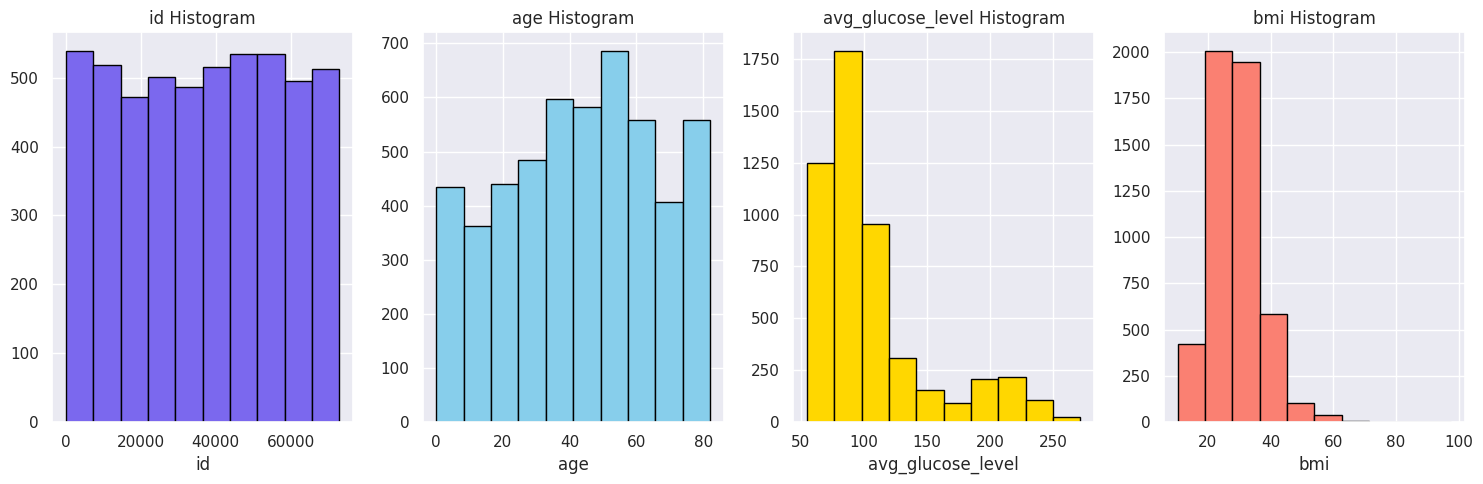

In [58]:
import random
import matplotlib.pyplot as plt

colors = ["skyblue", "lightgreen", "salmon", "gold", "lightcoral", "mediumslateblue", "orange"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, start=1):
    random_color = random.choice(colors)
    plt.subplot(1,len(numerical_features), i)
    plt.hist(cleaned_df[feature], bins=10, color=random_color, edgecolor='black')
    plt.title(f'{feature} Histogram')
    plt.xlabel(feature)

plt.tight_layout()
plt.show();

### Box plot for numerical

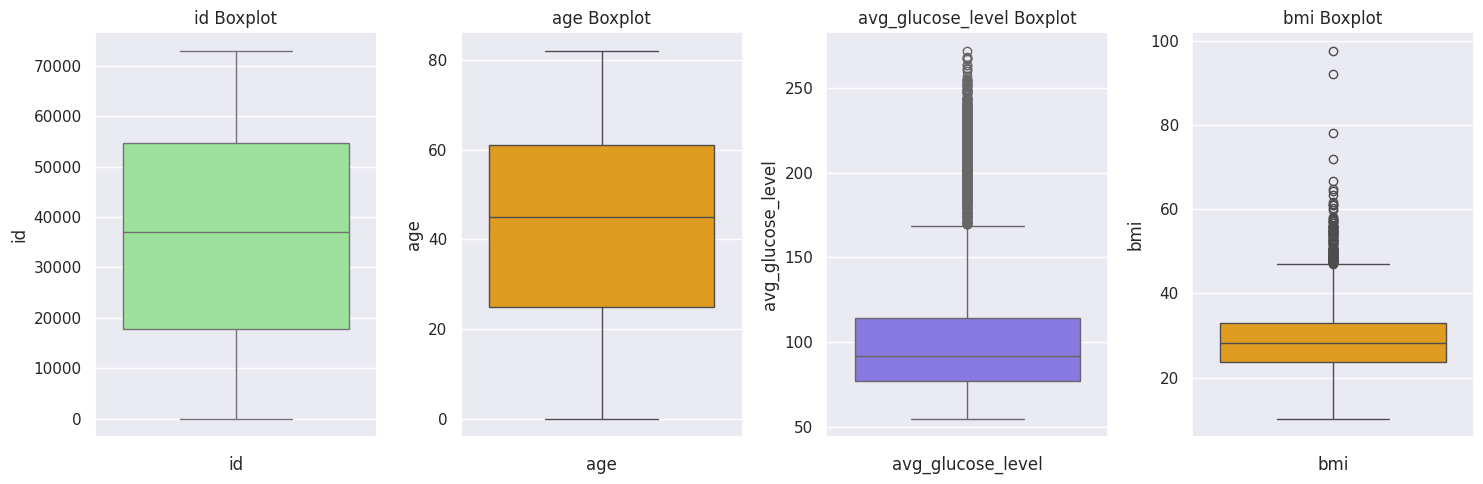

In [59]:
import random
import matplotlib.pyplot as plt

colors = ["skyblue", "lightgreen", "salmon", "gold", "lightcoral", "mediumslateblue", "orange"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, start=1):
    random_color = random.choice(colors)
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(cleaned_df[feature], color=random_color)
    plt.title(f'{feature} Boxplot')
    plt.xlabel(feature)

plt.tight_layout()
plt.show();

### Outlier

In [61]:
cleaned_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### avg_glucose_level

In [62]:
# avg_glucose_level
Q1 = cleaned_df["avg_glucose_level"].quantile(0.25)
Q3 = cleaned_df["avg_glucose_level"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = (
    (cleaned_df["avg_glucose_level"] < lower_bound) |
    (cleaned_df["avg_glucose_level"] > upper_bound)
)

avg_glucose_level_outlier_df = cleaned_df[condition]

In [63]:
avg_glucose_level_outlier_df.describe()

,id,age,avg_glucose_level,bmi
count,627.00,627.00,627.00,627.00
mean,36040.73,59.96,211.34,33.28
std,21013.15,16.26,20.83,7.66
min,239.00,1.00,169.43,14.20
25%,16920.00,52.00,196.76,27.90
50%,36377.00,62.00,210.00,32.20
75%,53477.50,72.50,226.71,37.20
max,72915.00,82.00,271.74,71.90


In [64]:
len(avg_glucose_level_outlier_df) / len(cleaned_df) * 100

12.270058708414872

In [75]:
# Tính các ngưỡng phân vị
glucose_95th = df['avg_glucose_level'].quantile(0.95)

# Tính tỷ lệ đột quỵ chung
overall_stroke_rate = (df['stroke'].sum() / len(df)) * 100

# Phân tích nhóm có glucose cao
high_glucose_mask = df['avg_glucose_level'] > glucose_95th
high_glucose_df = df[high_glucose_mask]
high_glucose_stroke_rate = (high_glucose_df['stroke'].sum() / len(high_glucose_df)) * 100

# so sánh
print(f"Tỷ lệ đột quỵ chung: {overall_stroke_rate:.2f}%")
print(f"Tỷ lệ đột quỵ nhóm có glucose cao: {high_glucose_stroke_rate:.2f}%")

Tỷ lệ đột quỵ chung: 4.87%
Tỷ lệ đột quỵ nhóm có glucose cao: 14.06%


In [77]:
glucose_95th

216.29450000000003

- Outliers ở cột này rất quan trọng, không thể bỏ được

In [76]:
def categorize_glucose_level(value):
    if value < 100:
        return 'Normal'
    elif 100 <= value <= 125:
        return 'Prediabetes'
    elif 126 <= value <= 216:
        return 'High Risk'
    else:
        return 'Very High Risk'

cleaned_df['glucose_category'] = cleaned_df['avg_glucose_level'].apply(categorize_glucose_level)

#### Bmi

In [79]:
# avg_glucose_level
Q1 = cleaned_df["bmi"].quantile(0.25)
Q3 = cleaned_df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = (
    (cleaned_df["bmi"] < lower_bound) |
    (cleaned_df["bmi"] > upper_bound)
)

bmi_outlier_df = cleaned_df[condition]

In [80]:
bmi_outlier_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,117.00,32247.38,21724.61,99.00,13861.00,32257.00,49277.00,72911.00
age,117.00,45.08,13.66,14.00,37.00,46.00,53.00,82.00
avg_glucose_level,117.00,122.00,58.64,56.63,79.36,98.07,176.78,253.16
bmi,117.00,53.77,7.51,47.10,49.30,52.30,55.70,97.60


In [81]:
len(bmi_outlier_df) / len(cleaned_df) * 100

2.289628180039139

- Không quá nhiều outliers, để nguyên đại đi

## Categorical

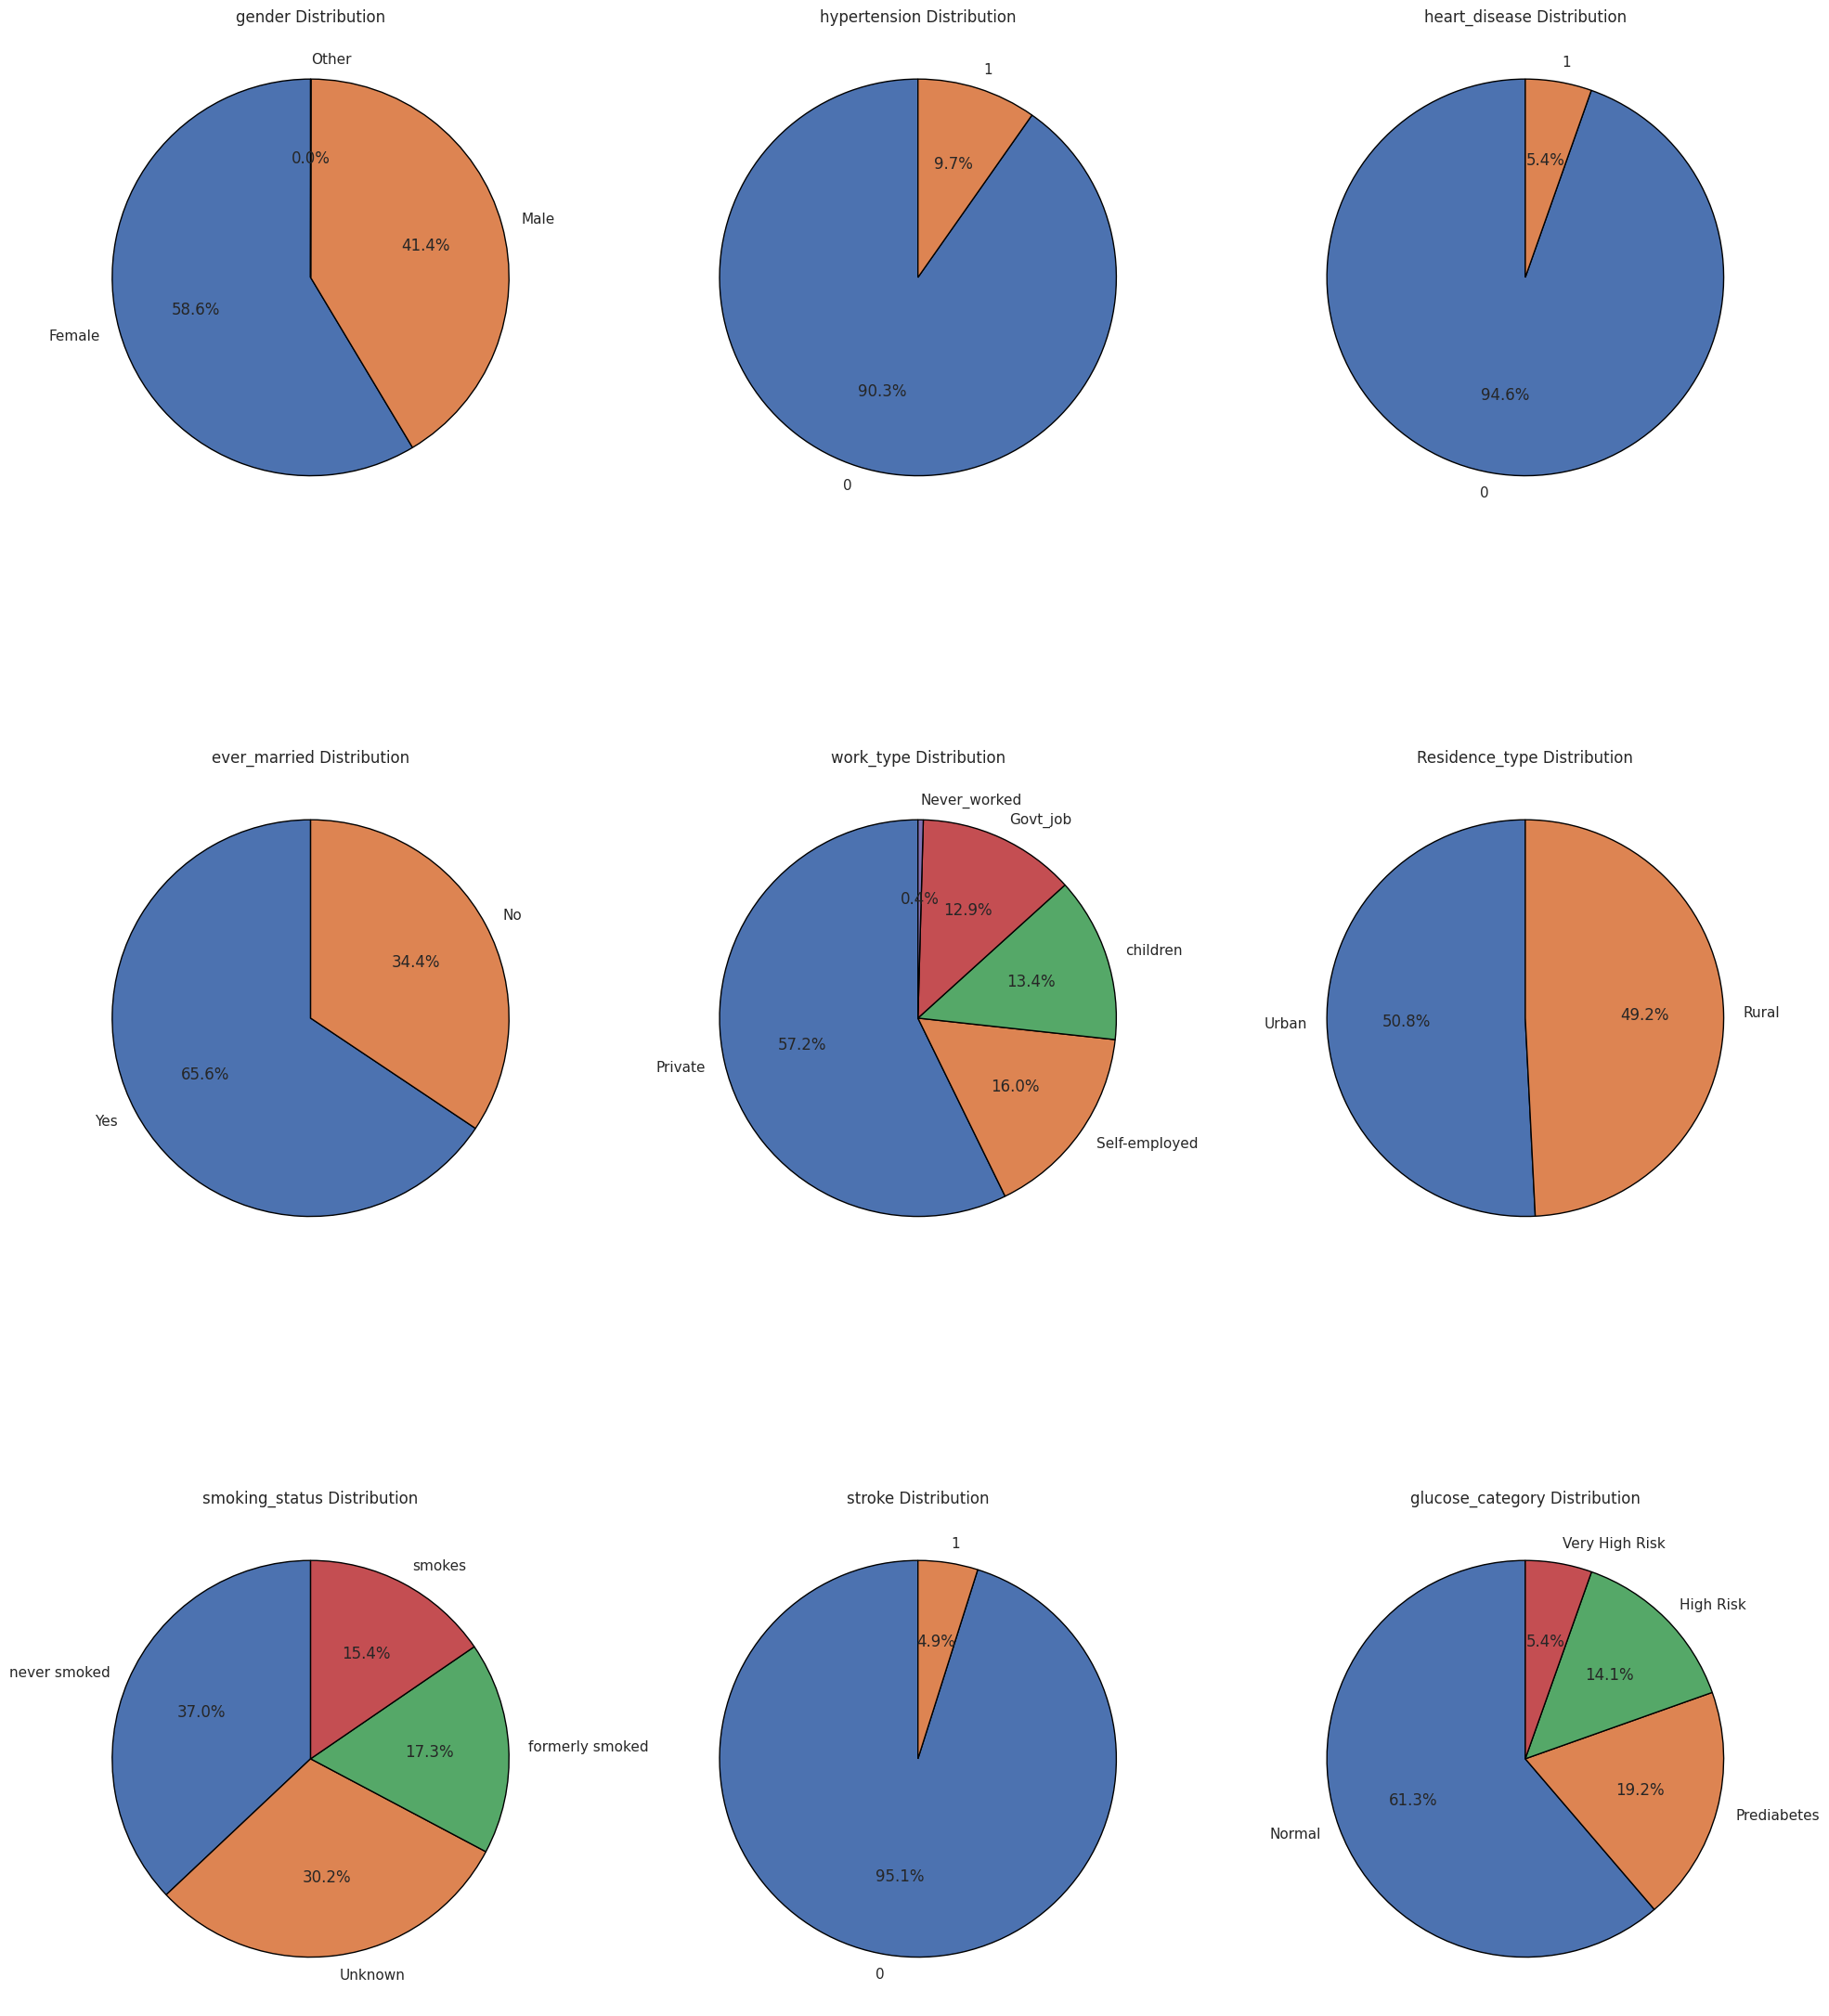

In [85]:
import matplotlib.pyplot as plt

# Define categorical features
categorical_features = ["gender", "hypertension", "heart_disease", "ever_married",
                        "work_type", "Residence_type", "smoking_status", "stroke"]

categorical_features.append('glucose_category')

# Create a figure

# Set up the size of the plot canvas
plt.figure(figsize=(20, 25))

# Loop through each categorical feature to create pie charts
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns for subplots
    cleaned_df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(f'{feature} Distribution')
    plt.ylabel('')  # Hide y-axis label for better visual

# Display the plot
plt.tight_layout()
plt.show()

In [86]:
cleaned_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'glucose_category'],
      dtype='object')

In [87]:
cleaned_df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [89]:
mask = (cleaned_df['gender'] == 'Other')
cleaned_df = cleaned_df[~mask]

In [90]:
cleaned_df['work_type'].value_counts()

,count
work_type,
Private,2924
Self-employed,819
children,687
Govt_job,657
Never_worked,22


## Target columns

### Pie chart

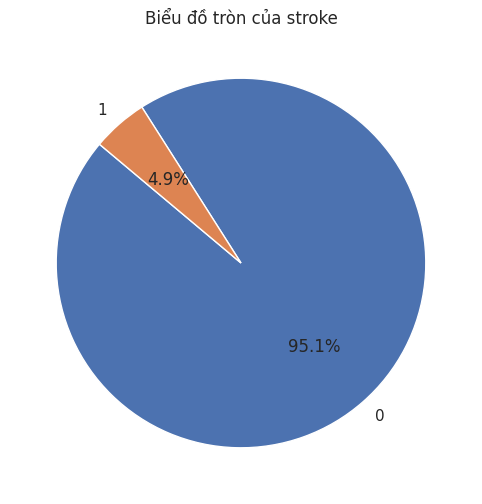

In [32]:
data = cleaned_df['stroke'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))  # Kích thước của biểu đồ
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ tròn của stroke')
plt.show()

### Barchart

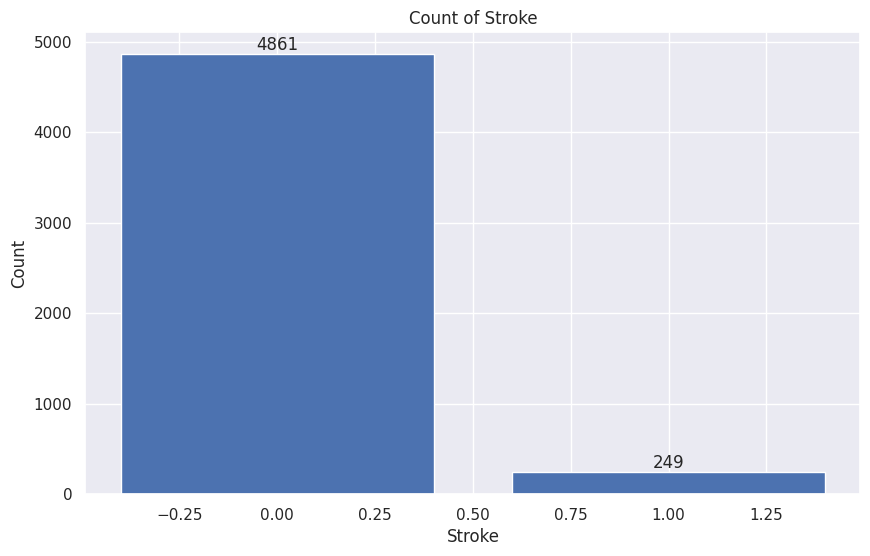

In [38]:
label_count = cleaned_df['stroke'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(label_count.index, label_count.values)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Count of Stroke')
for i, v in enumerate(label_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

### Xử lý imbalance

In [91]:
!pip install imbalanced-learn

In [92]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = cleaned_df.drop(['id', 'stroke'], axis=1)  # Drop 'id' and 'stroke' columns for features
y = cleaned_df['stroke']  # Target variable

# Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [93]:
y_train_smote.value_counts()

,count
stroke,
0,3416
1,3416


In [98]:
X_train_smote.head()

,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,glucose_category_Normal,glucose_category_Prediabetes,glucose_category_Very High Risk
0,15.00,74.83,17.40,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
1,29.00,207.58,22.80,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False
2,44.00,91.28,26.50,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False
3,68.00,150.74,40.30,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False
4,62.00,82.57,36.00,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False


# Correlation

In [99]:
data=X_train_smote.join(y_train_smote)

df_corr = data.corr()
df_corr

,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,glucose_category_Normal,glucose_category_Prediabetes,glucose_category_Very High Risk,stroke
age,1.00,0.27,0.22,0.16,NaN,0.34,0.36,0.67,-0.09,0.21,0.37,-0.61,0.23,0.32,0.20,0.04,-0.17,-0.06,0.18,0.59
avg_glucose_level,0.27,1.00,0.31,0.20,NaN,0.17,0.30,0.21,-0.02,0.09,0.06,-0.14,0.09,0.21,0.02,0.02,-0.78,-0.07,0.64,0.26
bmi,0.22,0.31,1.00,0.03,NaN,0.11,0.09,0.29,-0.03,0.17,0.03,-0.39,0.02,0.09,0.07,0.08,-0.18,-0.11,0.20,0.10
gender_Male,0.16,0.20,0.03,1.00,NaN,0.09,0.21,0.12,-0.00,0.06,0.05,-0.03,0.10,0.15,-0.03,0.09,-0.14,-0.02,0.14,0.26
gender_Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hypertension_1,0.34,0.17,0.11,0.09,NaN,1.00,0.21,0.22,-0.03,0.02,0.23,-0.15,0.11,0.15,0.26,0.05,-0.09,-0.15,0.12,0.38
heart_disease_1,0.36,0.30,0.09,0.21,NaN,0.21,1.00,0.20,-0.02,0.14,0.12,-0.14,0.14,0.17,0.03,0.10,-0.26,0.01,0.27,0.38
ever_married_Yes,0.67,0.21,0.29,0.12,NaN,0.22,0.20,1.00,-0.10,0.22,0.22,-0.55,0.13,0.23,0.13,0.15,-0.14,-0.03,0.12,0.42
work_type_Never_worked,-0.09,-0.02,-0.03,-0.00,NaN,-0.03,-0.02,-0.10,1.00,-0.08,-0.03,-0.01,-0.00,-0.03,0.01,-0.03,0.01,0.00,-0.01,-0.05
work_type_Private,0.21,0.09,0.17,0.06,NaN,0.02,0.14,0.22,-0.08,1.00,-0.33,-0.40,0.06,0.07,0.09,0.11,-0.02,-0.06,0.10,0.27


In [100]:
# ones_like can build a matrix of boolean (True, False) with the same shape as our data
ones_corr  = np.ones_like(df_corr,dtype=bool)

In [101]:
ones_corr.shape, df_corr.shape

((20, 20), (20, 20))

In [103]:
# np. triu: return only upper triangle matrix
mask = np.triu(ones_corr)
adjusted_mask = mask[1:,:-1]
adjusted_df_corr = df_corr.iloc[1:,:-1]

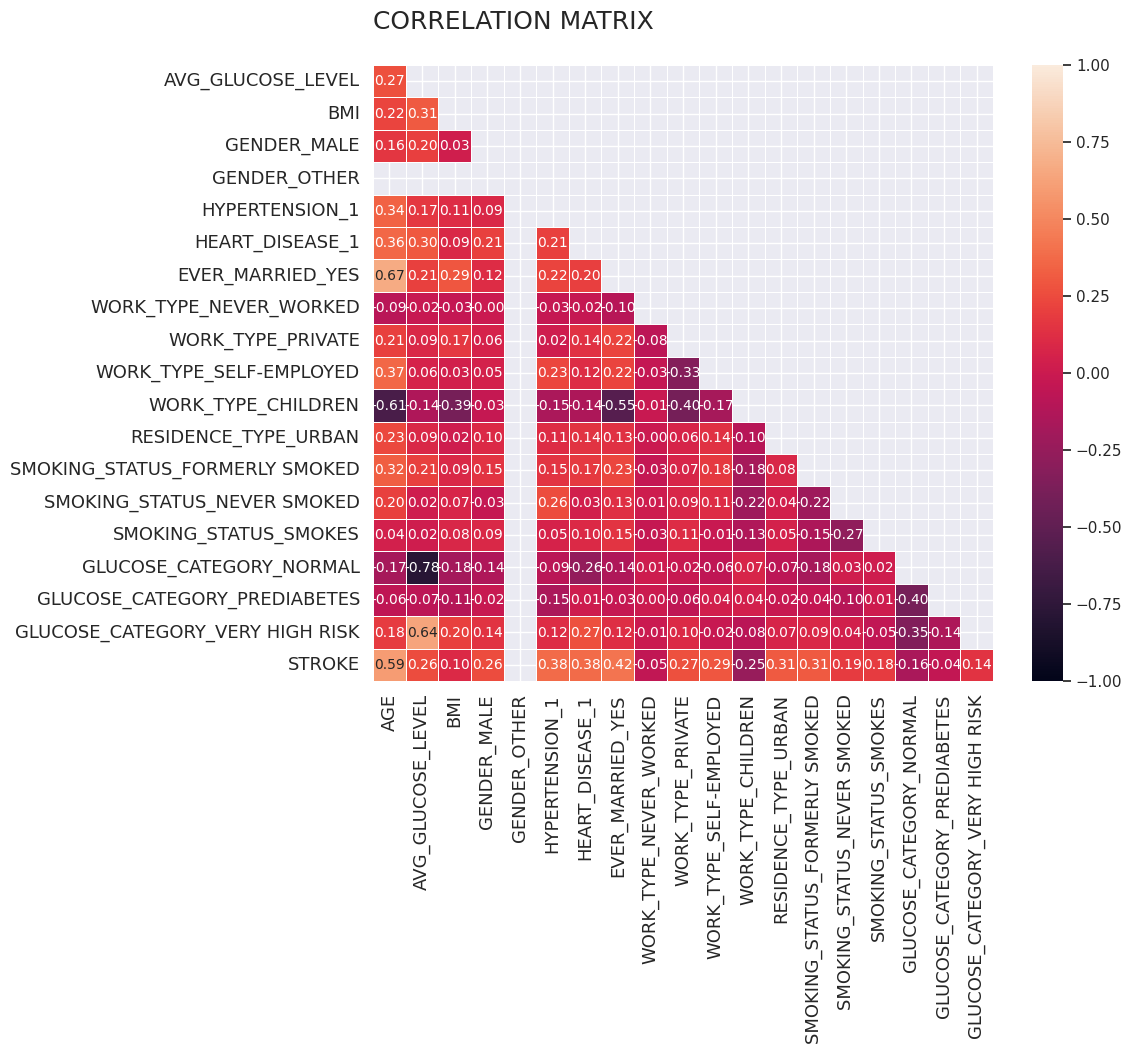

In [105]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data= adjusted_df_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":10}, fmt=".2f",
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_df_corr.index]
xticks = [i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);

# Train model

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

# Khởi tạo StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=40)

# Chia dữ liệu thành tập train và test
for train_index, test_index in sss.split(X_train_smote, y_train_smote):
    X_train, X_test = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
    y_train, y_test = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]

print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)

Kích thước tập train: (4577, 19)
Kích thước tập test: (2255, 19)


<ipython-input-108-a757d7e539d7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Blues", ax=ax[0, 0])
<ipython-input-108-a757d7e539d7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="Blues", ax=ax[0, 1])


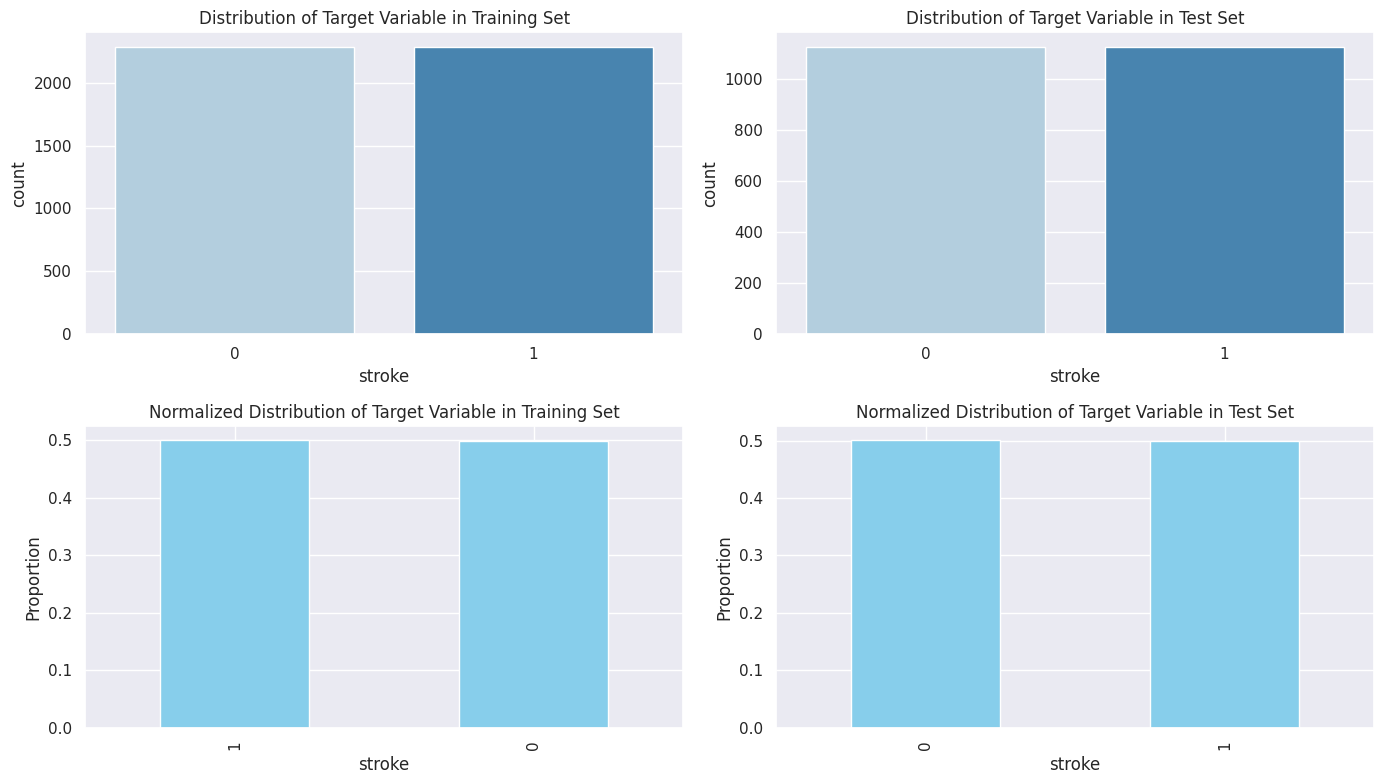

In [108]:
# Set up the number of rows and columns for subplots
n_rows = 2
n_cols = 2

# Create subplots to visualize the distribution of the target variable in train and test sets
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4))

# Plot distribution of target variable in training set
sns.countplot(x=y_train, palette="Blues", ax=ax[0, 0])
ax[0, 0].set_title("Distribution of Target Variable in Training Set")

# Plot distribution of target variable in test set
sns.countplot(x=y_test, palette="Blues", ax=ax[0, 1])
ax[0, 1].set_title("Distribution of Target Variable in Test Set")

# Plot normalized distribution of target variable in training set
y_train.value_counts(normalize=True).plot(kind='bar', color='skyblue', ax=ax[1, 0])
ax[1, 0].set_title("Normalized Distribution of Target Variable in Training Set")
ax[1, 0].set_ylabel("Proportion")

# Plot normalized distribution of target variable in test set
y_test.value_counts(normalize=True).plot(kind='bar', color='skyblue', ax=ax[1, 1])
ax[1, 1].set_title("Normalized Distribution of Target Variable in Test Set")
ax[1, 1].set_ylabel("Proportion")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [110]:
X_train_processed.shape

(4577, 19)

In [111]:
X_test_processed = scaler.transform(X_test)

In [112]:
X_test_processed.shape

(2255, 19)

## KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for KNeighborsClassifier = {accuracy_for_test}')

Accuracy for training set for KNeighborsClassifier = 0.91
Accuracy for test set for KNeighborsClassifier = 0.89


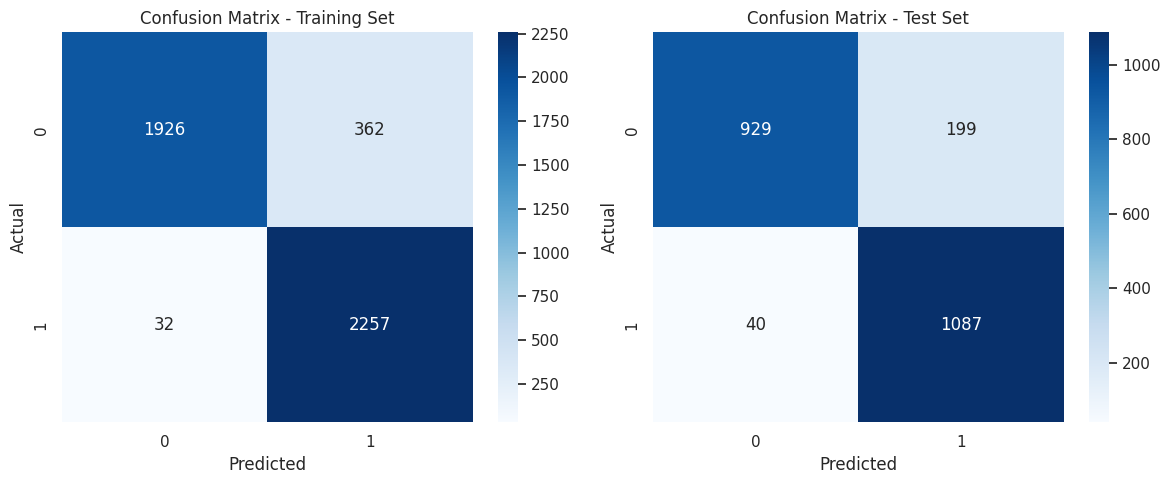

In [115]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

## SVM to predict

In [116]:
from sklearn.svm import SVC

# Train SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for SVM = {accuracy_for_train}')
print(f'Accuracy for test set for SVM = {accuracy_for_test}')

Accuracy for training set for SVM = 0.77
Accuracy for test set for SVM = 0.78


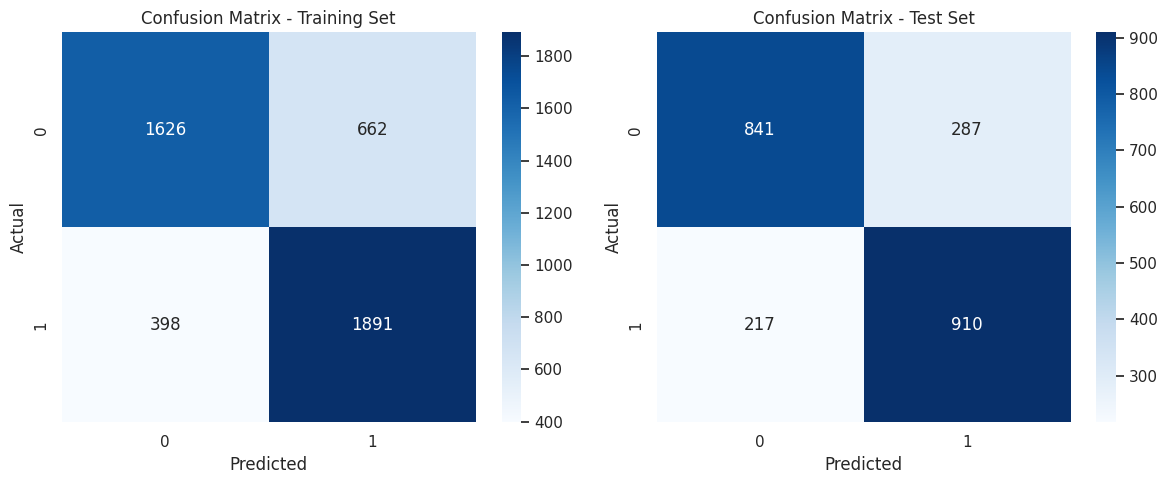

In [117]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

## Native Bayes to predict

In [118]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for NaiveBayesClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for NaiveBayesClassifier = {accuracy_for_test}')

Accuracy for training set for NaiveBayesClassifier = 0.74
Accuracy for test set for NaiveBayesClassifier = 0.75


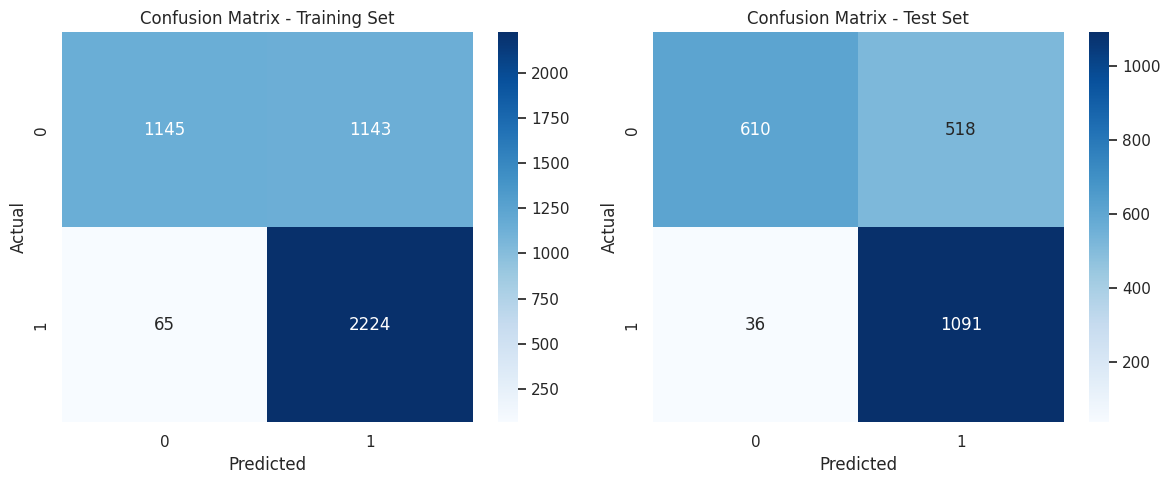

In [119]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

## Random Forest to predict

In [120]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for RandomForestClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for RandomForestClassifier = {accuracy_for_test}')

Accuracy for training set for RandomForestClassifier = 0.96
Accuracy for test set for RandomForestClassifier = 0.94


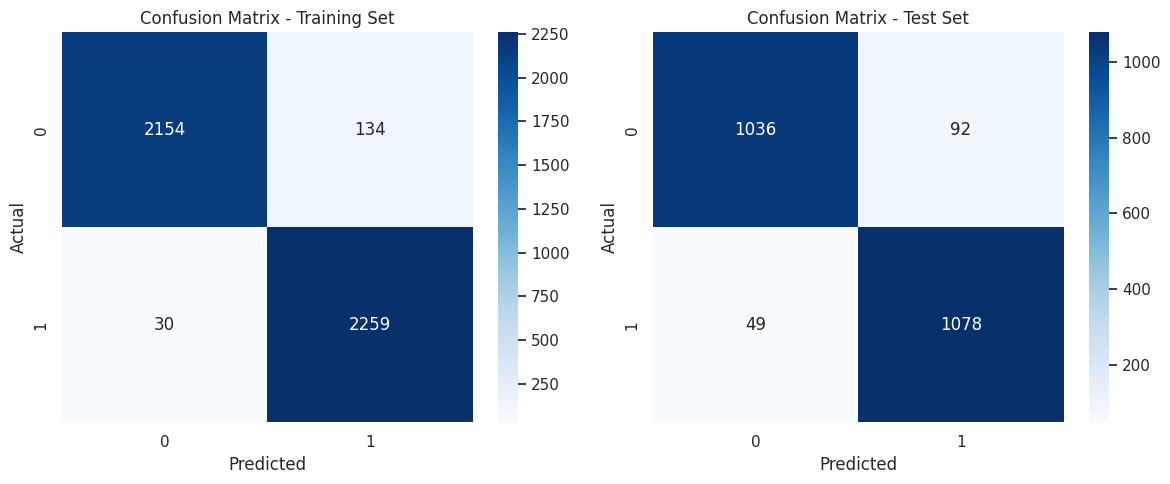

In [121]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

## Adaboost to predict

In [122]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for AdaBoostClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for AdaBoostClassifier = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoostClassifier = 0.88
Accuracy for test set for AdaBoostClassifier = 0.9


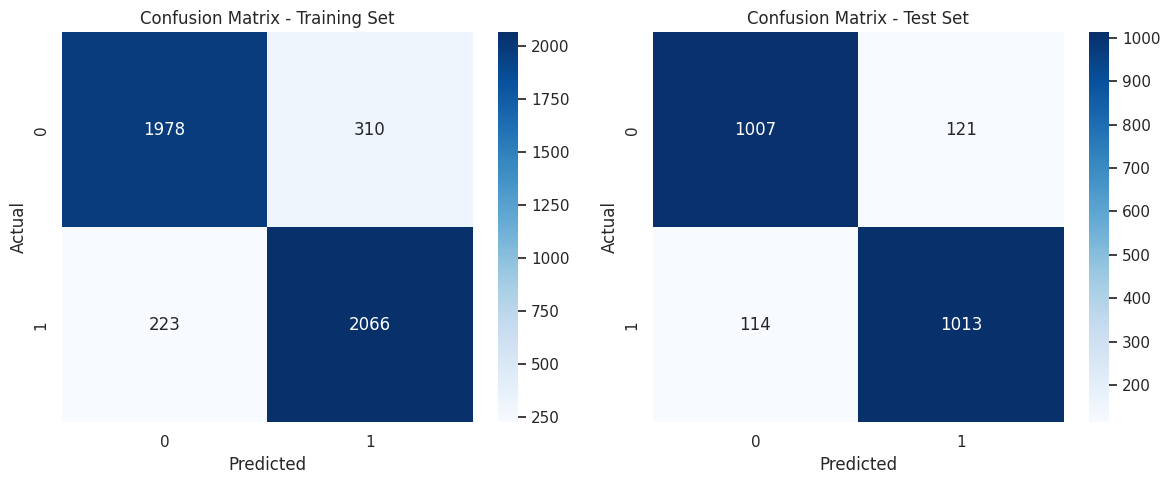

In [123]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

## GradientBoost to predict

In [124]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for GradientBoostingClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for GradientBoostingClassifier = {accuracy_for_test}')

Accuracy for training set for GradientBoostingClassifier = 0.93
Accuracy for test set for GradientBoostingClassifier = 0.92


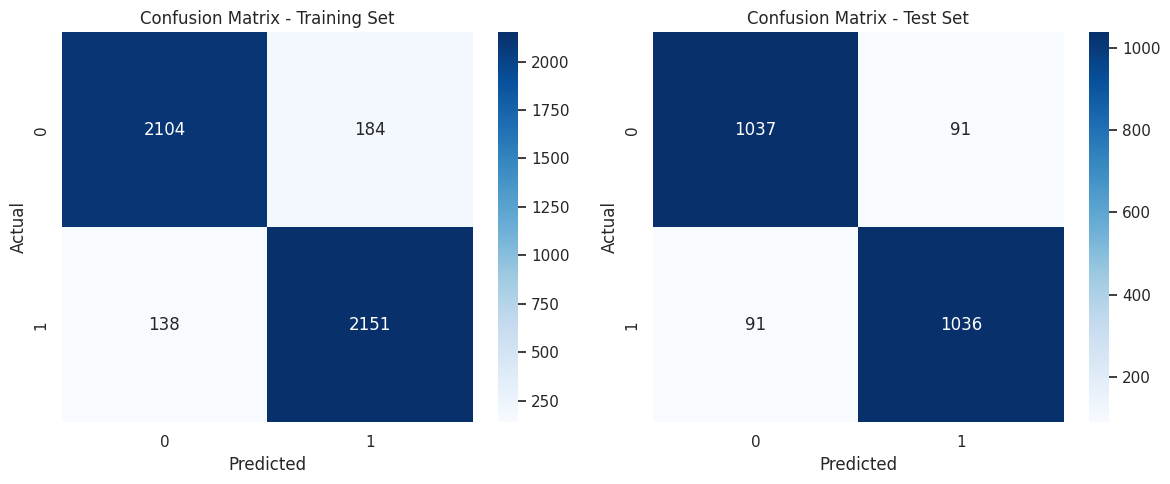

In [125]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## XGBoost to predict

In [126]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for XGBClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for XGBClassifier = {accuracy_for_test}')

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.96


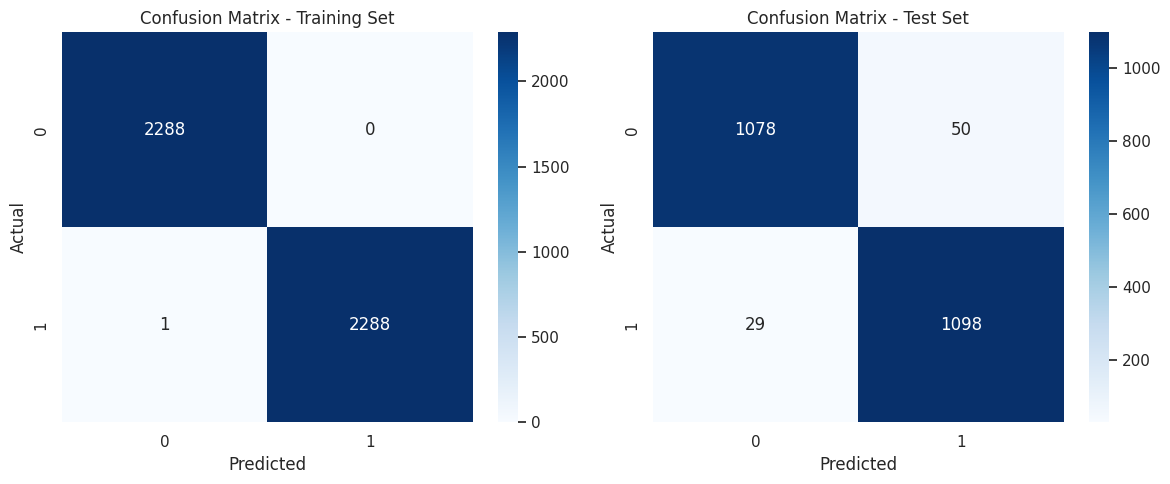

In [127]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Logistic Regression to predict

In [128]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for LogisticRegression = {accuracy_for_train}')
print(f'Accuracy for test set for LogisticRegression = {accuracy_for_test}')

Accuracy for training set for LogisticRegression = 0.88
Accuracy for test set for LogisticRegression = 0.88


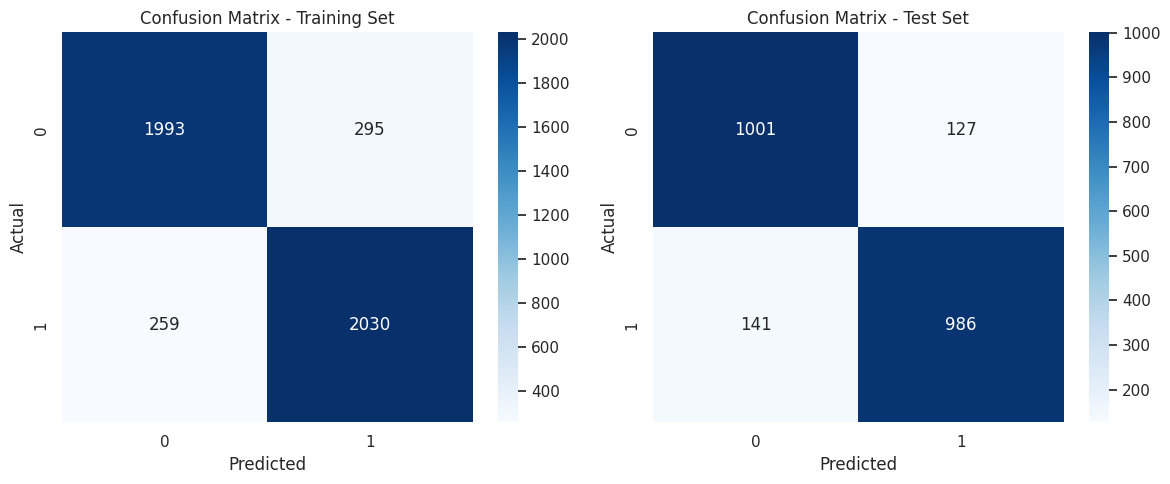

In [129]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

## Neural Networks (MLPClassifier) to predict

In [130]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for MLPClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for MLPClassifier = {accuracy_for_test}')

Accuracy for training set for MLPClassifier = 0.89
Accuracy for test set for MLPClassifier = 0.89


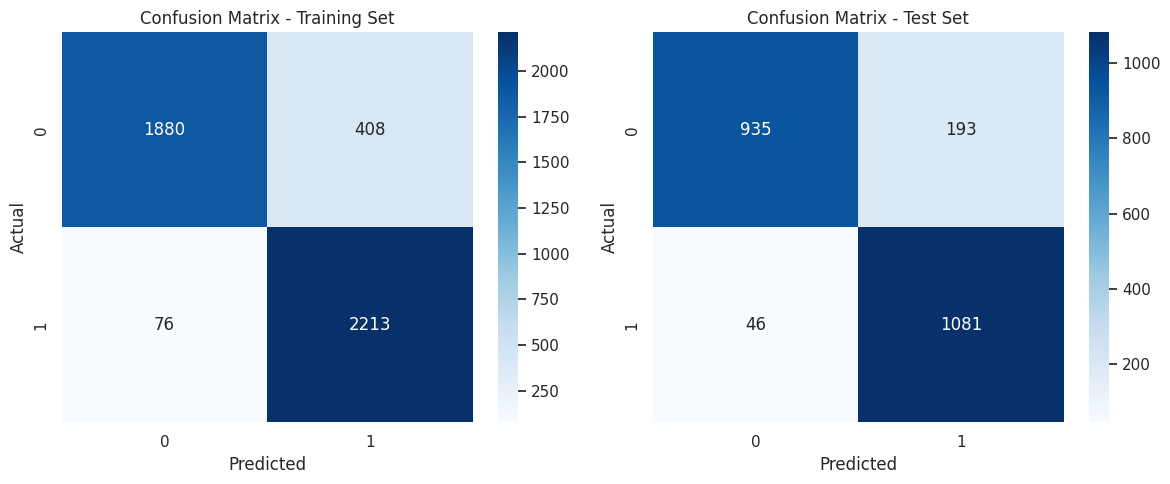

In [131]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Stacking to predict

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [133]:
# Define base learners
base_learners = [
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
]

# Train Stacking Classifier model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=RandomForestClassifier(random_state=42))
stacking_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for StackingClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for StackingClassifier = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for StackingClassifier = 1.0
Accuracy for test set for StackingClassifier = 0.97


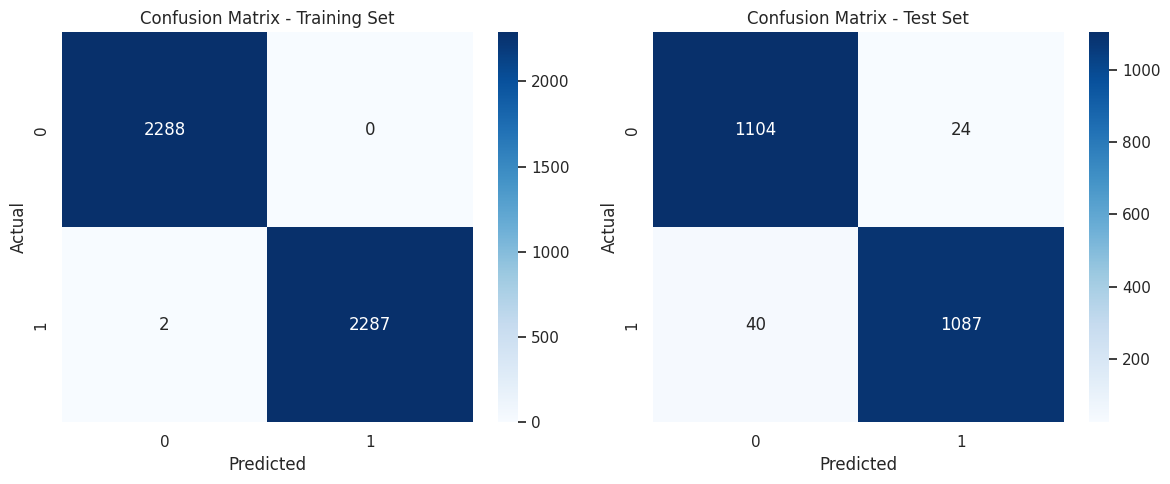

In [134]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

In [138]:
# Define a function for making predictions on user-provided sample
def predict_stroke(sample_input):
    # Expected order of input: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
    # 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

    # Sample data in the same order as features used in the training set
    sample_df = pd.DataFrame([sample_input], columns=[
        'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'
    ])

    # Convert categorical variables into dummy variables, similar to the training data
    sample_processed = pd.get_dummies(sample_df, drop_first=True)

    # Align the columns of sample data with training data to avoid dimension mismatch
    sample_processed = sample_processed.reindex(columns=X_train.columns, fill_value=0)

    # Make a prediction
    prediction = stacking_clf.predict(sample_processed)

    # Return the prediction result
    return "Đột quỵ" if prediction[0] == 1 else "Không đột quỵ"

In [144]:
# Example usage of the function
sample_input = ['Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 216, 36.0, 'formerly smoked']
result = predict_stroke(sample_input)
print("Dự đoán cho mẫu đầu vào:", result)

Dự đoán cho mẫu đầu vào: Không đột quỵ


In [147]:
def predict_stroke_for_dataframe(input_df):
    """
    Predicts stroke for each row in the provided DataFrame.
    Args:
    - input_df (pd.DataFrame): DataFrame with columns matching the expected features.

    Returns:
    - pd.Series: A series containing the predictions ("Đột quỵ" or "Không đột quỵ") for each row.
    """
    # Convert categorical variables into dummy variables, similar to the training data
    sample_processed = pd.get_dummies(input_df, drop_first=True)

    # Align the columns of the sample data with training data to avoid dimension mismatch
    sample_processed = sample_processed.reindex(columns=X_train.columns, fill_value=0)

    # Make predictions
    predictions = stacking_clf.predict(sample_processed)

    # Convert numerical predictions to descriptive labels
    result_labels = ["Đột quỵ" if pred == 1 else "Không đột quỵ" for pred in predictions]

    return pd.Series(result_labels, index=input_df.index)

In [148]:
sample_data = cleaned_df[cleaned_df['stroke'] == 1]
# Get predictions for the sample data
result = predict_stroke_for_dataframe(sample_data)
print("Dự đoán cho các mẫu đầu vào:")
print(result)

Dự đoán cho các mẫu đầu vào:
0            Đột quỵ
1            Đột quỵ
2            Đột quỵ
3            Đột quỵ
4            Đột quỵ
           ...      
244          Đột quỵ
245    Không đột quỵ
246          Đột quỵ
247    Không đột quỵ
248    Không đột quỵ
Length: 249, dtype: object
